# 선형회귀 예시(1) 다이아몬드 가격에 영향을 미치는 요인

## #01. 작업준비

### 1. 패키지 참조

In [4]:
import pandas as pd
import sys
import os 
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
import helper

import numpy as np
from pandas import read_excel, DataFrame, melt, merge
from pca import pca
from pandas.api.types import CategoricalDtype
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

### 2. 데이터 가져오기


|변수	|의미	|기타|
|--|--|--|
|carat|	무게	|ex) 3캐럿짜리 다이아몬드|
|cut|	세공의 질|	다이아몬드의 단면을 어떻게 커팅하였는지에 대한 상태값을 분류 '계층이 있는 범주형(factor)'데이터 "Fair", "Good", "Very Good", "Premium", "Ideal"로 나누어진다.|
|color	|컬러|	총 7개의 컬러로 표기된 범주형 데이터|
|clarity	|투명도	|범주형 데이터|
|depth	|깊이	|수치형 데이터|
|table	|넓은 폭 대비 꼭대기의 넓이|	수치형 데이터|
|price	|가격($)	|수치형 데이터|
|x	|길이|	수치형 데이터|
|y	|넓이|	수치형 데이터|
|z	|깊이|	수치형 데이터|

In [5]:
df= pd.read_excel('https://data.hossam.kr/E04/diamonds.xlsx')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## #02.데이터 전처리
### 1. 데이터 프레임 복사 


In [6]:
edf = df.copy()
edf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 2. 결측치 확인

In [7]:
edf.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### 3. 데이터 타입 확인

In [8]:
edf.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### 4. 일단 분석
#### 1) 회귀분석

In [10]:
edf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
tmp = edf.loc[:,['carat','depth','table','x','y','z','price']]


,carat,depth,table,x,y,z,price
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335


In [27]:
expr = 'price ~ depth + table + x + y + z + carat'

model = ols(expr,data = tmp)
fit = model.fit()

summary = fit.summary()

summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:58:19   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
ols_result = helper.my_ols(tmp, y='price', x=['carat', 'depth', 'table', 'x', 'y', 'z'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:58:39   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.562     46.584      0.0

### 3) 잔차 분석 
#### 결과치 생성
 
 

In [35]:
sdf = pd.DataFrame({
    "관측값": edf['price'],
    "예측값": ols_result.fit.fittedvalues,
    "잔차": ols_result.fit.resid,
    "zscore": stats.zscore(ols_result.fit.fittedvalues)
})

sdf

,관측값,예측값,잔차,zscore
0,326,346.909718,-20.909718,-0.969700
1,326,-71.468765,397.468765,-1.082838
2,327,126.368674,200.631326,-1.029339
3,334,193.901639,140.098361,-1.011076
4,335,53.549591,281.450409,-1.049030
...,...,...,...,...
53935,2757,3314.909673,-557.909673,-0.167090
53936,2757,3135.402558,-378.402558,-0.215633
53937,2757,2503.140469,253.859531,-0.386610
53938,2757,4175.515769,-1418.515769,0.065635


### 잔차의 정규성 검정

#### Q-Q Plot

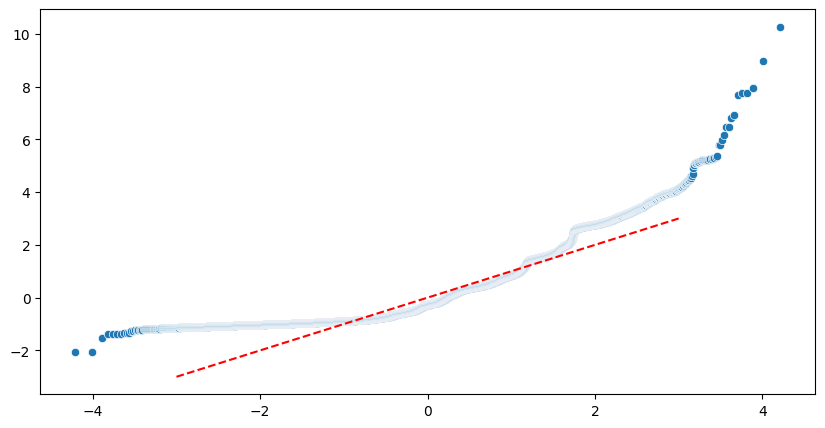

In [37]:
(x,y), _ =stats.probplot(sdf['zscore'])
plt.figure(figsize=(10, 5))
sb.scatterplot(x=x, y=y)
sb.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')
plt.show()
plt.close()

### 정규성 판단을 위한 k-s 검정

표본 수 가 50개 이상인 경우 사용


In [40]:
s, p = stats.kstest(sdf['잔차'],'norm')
print("Kolmogorov Smirnov Test: (통계량, p-value) = ", (s, p))
if p > 0.05:
    print("잔차는 정규 분포를 따릅니다. (귀무가설 채택)")
else:
    print("잔차는 정규 분포를 따르지 않습니다. (귀무가설 기각)")

Kolmogorov Smirnov Test: (통계량, p-value) =  (0.5298424160387368, 0.0)
잔차는 정규 분포를 따르지 않습니다. (귀무가설 기각)


### 잔차의 등분산성 검정

In [ ]:
###  ols_result.fit.model.exog -> 관측변수인 데이터의 이름

In [43]:
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

test_result = het_breuschpagan(sdf['잔차'],ols_result.fit.model.exog)
pd.DataFrame(test_result,index=names)
## 각종 검정 결과를 종합하여 분석 결과를 신뢰할 수 없는 것으로 판단하고 재시도.

,0
Lagrange multiplier statistic,9934.176446
p-value,0.000000
f-value,2029.200891
f p-value,0.000000


### 4. 범주형 타입 변환
#### 1) 순서 있는 범주형 설정

In [47]:
CategoricalDtype

pandas.core.dtypes.dtypes.CategoricalDtype

In [48]:
ctype = CategoricalDtype(categories=["Fair", "Good", "Very Good", "Premium", "Ideal"], ordered=True)

edf['cut'] = edf['cut'].astype(ctype)

edf.dtypes


carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

#### 2) 순서 없는 범주형 설정

In [49]:
edf['color'] = edf['color'].astype('category')
edf['clarity'] = edf['clarity'].astype('category')
edf.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

## #03. 요인선정을 위한 탐색적 데이터 분석
### 1. 수치형 변수
#### 1) 기초 통계량 확인
##### 범주형 데이터는 자동으로 제외한다.

In [50]:
desc = edf.describe()
desc

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### 2) 상자그림 확인 


<Axes: >

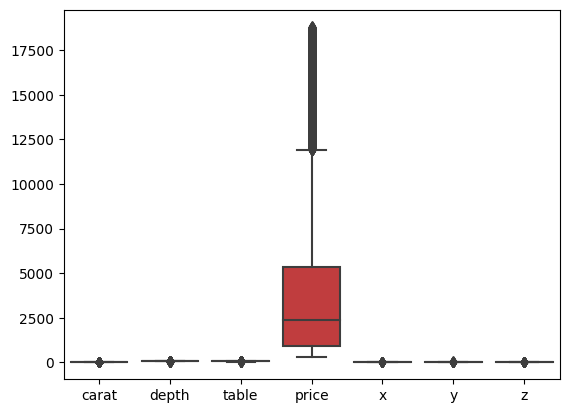

In [52]:
sb.boxplot(data = edf)
### 가격을 제외하고는 비슷한 범위를 갖고 있으므로 표준화 불필요

In [58]:
desc.columns[1]

'depth'

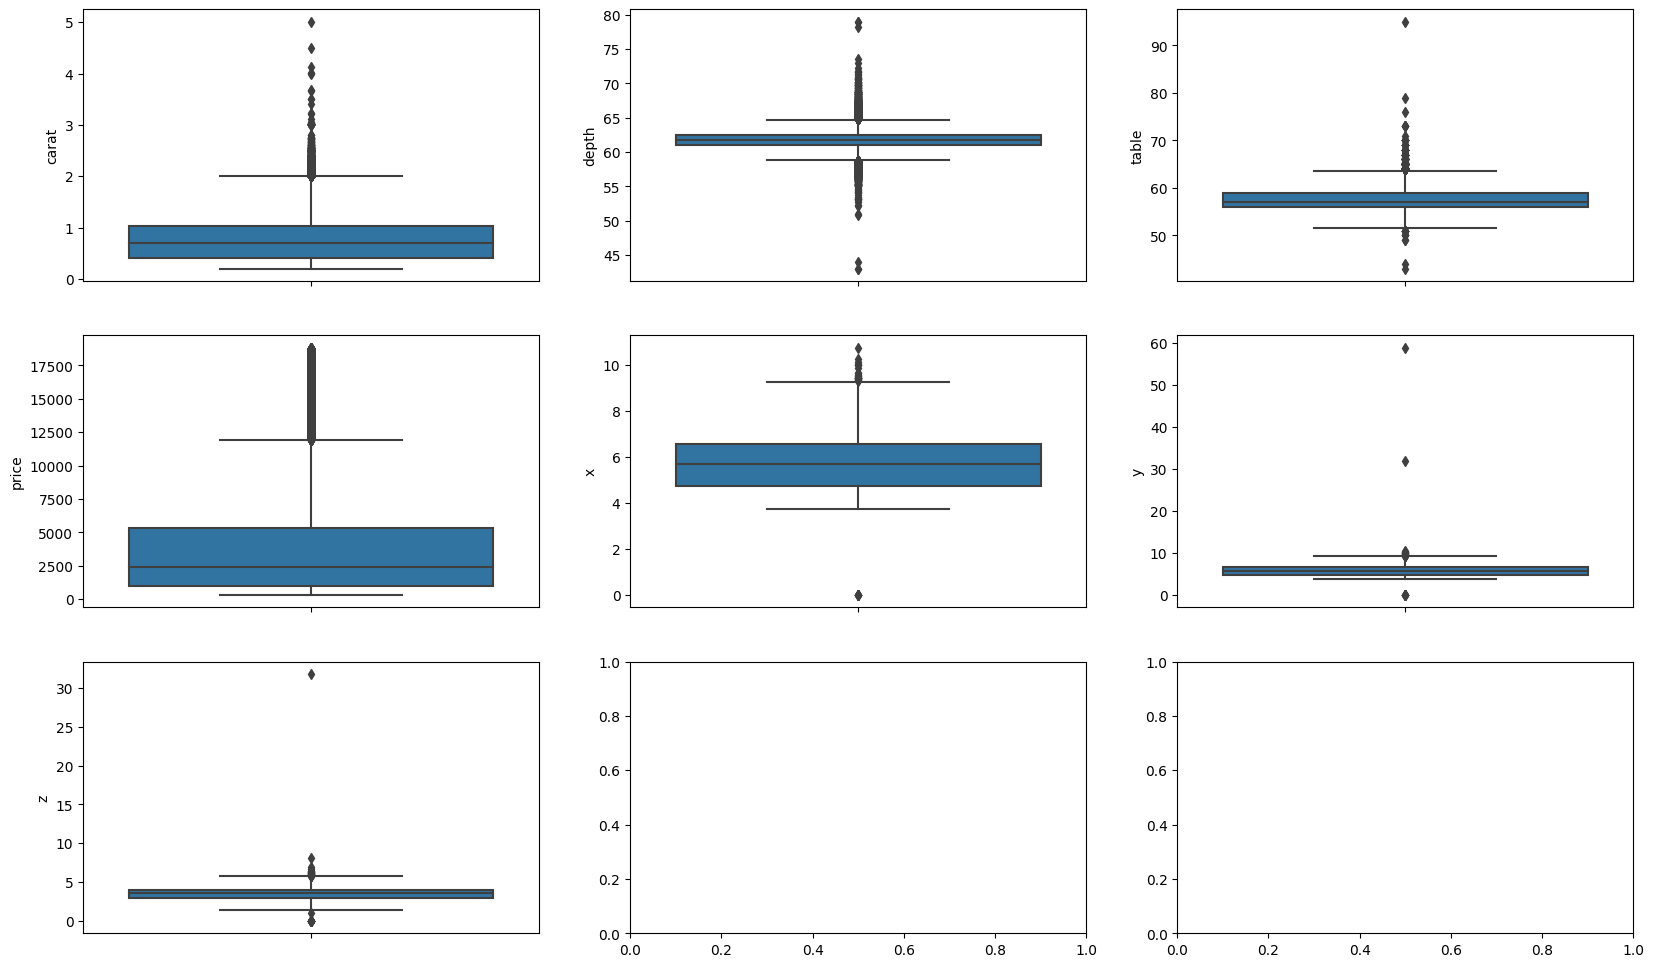

In [56]:
fig, ax = plt.subplots(3, 3, figsize=(20, 12))
rows = len(ax)
cols = len(ax[0])


for i in range(0,rows):
    for j in range(0,cols) :
        idx = i * cols + j
        sb.boxplot(edf, y= desc.columns[idx],ax=ax[i][j])
        if idx+ 1 == len(desc.columns):
            break
plt.show()
plt.close()

#### 3) 산점도 행렬 확인

In [59]:
cnames = []
dtypes = edf.dtypes

for i , v in enumerate(dtypes):
    if v != 'category':
        print(dtypes.index[i],dtypes)
        cnames.append(dtypes.index[i])

print(cnames)


carat carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object
depth carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object
table carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object
price carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object
x carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float6

In [ ]:
plt.figure(figsize = (30,20))

sb.pairplot(data = edf,vars=cnames,kind='reg')

#### 4) PCA 분석
회귀분석에 필요한 요인들을 선정하기 위해 주성분 분석을 수행한다.

데이터 표준화
범주형은 PCA를 수행할 수 없기 때문에 edf에서 수치형 변수만 추출하여 처리한다.

종속 변수인 가격은 제외하고 진행한다.

In [71]:
x_train_std_df, y_train_std_df = helper.scailing(edf[cnames], 'price')
x_train_std_df = pd.DataFrame(x_train_std_df,columns=['carat',	'depth',	'table',	'x'	,'y',	'z'])
y_train_std_df = pd.DataFrame(y_train_std_df,columns=['price'])
y_train_std_df



,price
0,-0.904095
1,-0.904095
2,-0.903844
3,-0.902090
4,-0.901839
...,...
53935,-0.294731
53936,-0.294731
53937,-0.294731
53938,-0.294731


##### PCA

In [72]:
model = pca()
fit = model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,x,0.500910,best
1,PC2,depth,-0.734082,best
2,PC3,table,0.732523,best
3,PC1,carat,0.495367,weak
4,PC1,y,0.495218,weak
5,PC1,z,0.493882,weak


##### 주성분 선정 

In [73]:
best = topfeat.query("type=='best'")
best_names = list(set(list(best['feature'])))
best_names

['table', 'depth', 'x']

### 2. 범주형 변수

In [74]:
cnames = []
dtypes = edf.dtypes

for i, v in enumerate(dtypes):
    if v == 'category':
        print(dtypes.index[i], dtypes[i])
        cnames.append(dtypes.index[i])
        
print(cnames)

cut category
color category
clarity category
['cut', 'color', 'clarity']


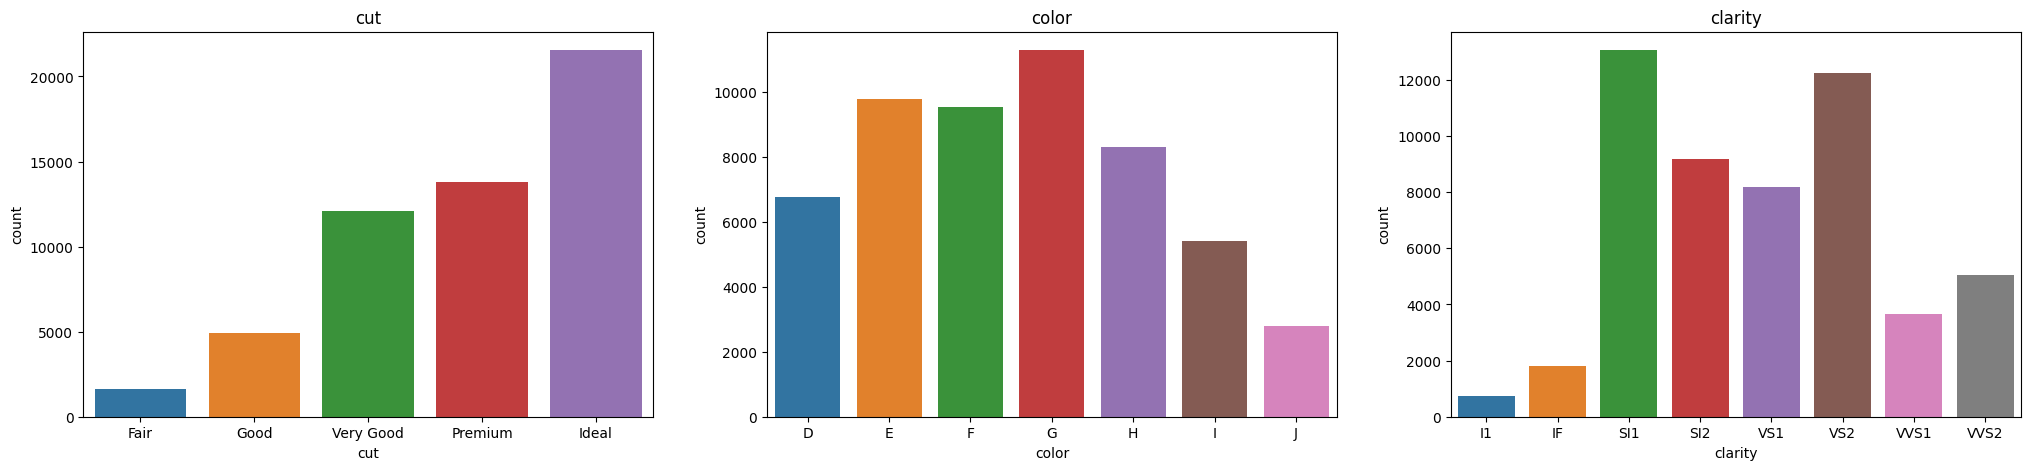

In [75]:
fig, ax = plt.subplots(1, len(cnames), figsize=(25, 5))

for i, v in enumerate(cnames):
    vc = DataFrame(edf[v].value_counts(), columns=['count'])
    #print(vc)
    sb.barplot(data=vc, x=vc.index, y='count', ax=ax[i])
    ax[i].set_title(v)
    
plt.show()
plt.close()

##### cut 변수에 대한 분산 분석

데이터 타입 확인 -> 범주형


In [85]:

edf['cut'].dtypes

CategoricalDtype(categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True)

In [86]:
edf['cut'].dtypes.categories

Index(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype='object')

In [87]:
mydict = {}

for i, v in enumerate(edf['cut'].dtypes.categories):
    mydict[v] = i
    
mydict

{'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

In [83]:
tmp_df

,price,cut
0,326,Ideal
1,326,Premium
2,327,Good
3,334,Premium
4,335,Good
...,...,...
53935,2757,Ideal
53936,2757,Good
53937,2757,Very Good
53938,2757,Premium


In [88]:
tmp_df = edf.filter(['price', 'cut'])
tmp_df['cut'] = tmp_df['cut'].map(mydict).astype('int')
tmp_df

,price,cut
0,326,4
1,326,3
2,327,1
3,334,3
4,335,1
...,...,...
53935,2757,4
53936,2757,1
53937,2757,2
53938,2757,3


In [89]:

helper.all_test(tmp_df['price'], tmp_df['cut'])

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistic  p-value  Result
Condition Test      Field                                       
정규성       Shapiro   price              0.798108      0.0   False
                    cut                0.840702      0.0   False
          normal    price          15096.649760      0.0   False
                    cut             4332.539804      0.0   False
          k-s_2samp price vs cut       1.000000      0.0   False
                    cut vs price       1.000000      0.0   False
등분산성      Bartlett  price vs cut  807779.816409      0.0   False
          Fligner   price vs cut   67384.102299      0.0   False
          Levene    price vs cut   40950.073151      0.0   False
독립성       Chi2      price vs cut  324145.369656      0.0   False

In [91]:
yname = 'price'
xname = 'color'
mydict = {}

for i, v in enumerate(edf[xname].dtypes.categories):
    mydict[v] = i
#mydict

tmp_df = edf.filter([yname, xname])
tmp_df[xname] = tmp_df[xname].map(mydict).astype('int')
#tmp_df

helper.all_test(tmp_df[yname], tmp_df[xname])

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistic  p-value  Result
Condition Test      Field                                         
정규성       Shapiro   price                0.798108      0.0   False
                    color                0.940571      0.0   False
          normal    price            15096.649760      0.0   False
                    color             6626.896240      0.0   False
          k-s_2samp price vs color       1.000000      0.0   False
                    color vs price       1.000000      0.0   False
등분산성      Bartlett  price vs color  762364.728392      0.0   False
          Fligner   price vs color   66621.087909      0.0   False
          Levene    price vs color   40934.516266      0.0   False
독립성       Chi2      price vs color  334347.410196      0.0   False

In [93]:
yname = 'price'
xname = 'clarity'
mydict = {}

for i, v in enumerate(edf[xname].dtypes.categories):
    mydict[v] = i
#mydict

tmp_df = edf.filter([yname, xname])
tmp_df[xname] = tmp_df[xname].map(mydict).astype('int')
#tmp_df

helper.all_test(tmp_df[yname], tmp_df[xname])

c:\Users\hamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistic  p-value  Result
Condition Test      Field                                           
정규성       Shapiro   price                  0.798108      0.0   False
                    clarity                0.935033      0.0   False
          normal    price              15096.649760      0.0   False
                    clarity             5334.539297      0.0   False
          k-s_2samp price vs clarity       1.000000      0.0   False
                    clarity vs price       1.000000      0.0   False
등분산성      Bartlett  price vs clarity  760885.511472      0.0   False
          Fligner   price vs clarity   66703.258969      0.0   False
          Levene    price vs clarity   40933.764494      0.0   False
독립성       Chi2      price vs clarity  492832.359914      0.0   False

## #04. 회귀분석 수행
### 1. 최종 요인 선정 

In [94]:
target_names = best_names + ['price']
target_names


['table', 'depth', 'x', 'price']

In [95]:
merge_df = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
df = merge_df.filter(target_names)
df

,table,depth,x,price
0,-1.099672,-0.174092,-1.587837,-0.904095
1,1.585529,-1.360738,-1.641325,-0.904095
2,3.375663,-3.385019,-1.498691,-0.903844
3,0.242928,0.454133,-1.364971,-0.902090
4,0.242928,1.082358,-1.240167,-0.901839
...,...,...,...,...
53935,-0.204605,-0.662711,0.016798,-0.294731
53936,-1.099672,0.942753,-0.036690,-0.294731
53937,1.137995,0.733344,-0.063434,-0.294731
53938,0.242928,-0.523105,0.373383,-0.294731


### 2. 1차 회귀분석 수행
#### 1) 분석 

In [97]:
ols_result = helper.my_ols(df, y='price', x=best_names)
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 6.541e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:58:50   Log-Likelihood:                -35157.
No. Observations:               53940   AIC:                         7.032e+04
Df Residuals:                   53936   BIC:                         7.036e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.96e-16      0.002    9.8e-14      1.0

#### 2) 결과 보고

In [98]:
ols_result.table

B   표준오차  β         t   유의확률       VIF
종속변수  독립변수                                                    
price Intercept  1.96e-16  0.002  0  9.8e-14*  1.000  0.000000
      table       -0.0481  0.002  0  -22.549*  0.000  1.150738
      depth       -0.0023  0.002  0   -1.090*  0.276  1.097216
      x            0.8938  0.002  0  438.159*  0.000  4.746060

In [99]:
print(ols_result.result, end="\n\n")
print(ols_result.goodness, end="\n\n")
for i in ols_result.varstr:
    print(i)

                        B   표준오차  β         t   유의확률       VIF
종속변수  독립변수                                                    
price Intercept  1.96e-16  0.002  0  9.8e-14*  1.000  0.000000
      table       -0.0481  0.002  0  -22.549*  0.000  1.150738
      depth       -0.0023  0.002  0   -1.090*  0.276  1.097216
      x            0.8938  0.002  0  438.159*  0.000  4.746060

price에 대하여 table,depth,x로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(3,53936) = 6.541e+04, p < 0.05).

table의 회귀계수는 -0.0481(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
depth의 회귀계수는 -0.0023(p>0.05)로, price에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
x의 회귀계수는 0.8938(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.


#### 2. 2차분석 
통계적으로 유의하지 않은 depth 를 제외하고 다시 수행하여 설명력의 차이를 확인한다 . 
##### 1) 요인 제거

In [100]:
df2 = df.drop('depth', axis=1)
df2

,table,x,price
0,-1.099672,-1.587837,-0.904095
1,1.585529,-1.641325,-0.904095
2,3.375663,-1.498691,-0.903844
3,0.242928,-1.364971,-0.902090
4,0.242928,-1.240167,-0.901839
...,...,...,...
53935,-0.204605,0.016798,-0.294731
53936,-1.099672,-0.036690,-0.294731
53937,1.137995,-0.063434,-0.294731
53938,0.242928,0.373383,-0.294731


#### 2) 분석 수행 및 결과 보고

In [102]:
ols_result = helper.my_ols(df2, y='price', x=['x', 'table'])
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 9.811e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:03:23   Log-Likelihood:                -35158.
No. Observations:               53940   AIC:                         7.032e+04
Df Residuals:                   53937   BIC:                         7.035e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.25e-17      0.002  -2.13e-14      1.0

In [103]:
ols_result.table

B   표준오차  β           t   유의확률       VIF
종속변수  독립변수                                                       
price Intercept  -4.25e-17  0.002  0  -2.13e-14*  1.000  0.000000
      x             0.8937  0.002  0    438.384*  0.000  4.744087
      table        -0.0474  0.002  0    -23.273*  0.000  1.050114

In [104]:
sdf = DataFrame({
    "관측값": df2['price'],
    "예측값": ols_result.fit.fittedvalues,
    "잔차": ols_result.fit.resid,
    "zscore": stats.zscore(ols_result.fit.fittedvalues)
})

sdf

,관측값,예측값,잔차,zscore
0,-0.904095,-1.366881,0.462786,-1.543350
1,-0.904095,-1.542085,0.637990,-1.741174
2,-0.903844,-1.499547,0.595702,-1.693144
3,-0.902090,-1.231406,0.329316,-1.390384
4,-0.901839,-1.119867,0.218028,-1.264446
...,...,...,...,...
53935,-0.294731,0.024720,-0.319451,0.027911
53936,-0.294731,0.019385,-0.314116,0.021888
53937,-0.294731,-0.110685,-0.184046,-0.124974
53938,-0.294731,0.322168,-0.616899,0.363761


In [105]:
print(ols_result.result, end="\n\n")

print(ols_result.goodness, end="\n\n")

for i in ols_result.varstr:
    print(i)

                         B   표준오차  β           t   유의확률       VIF
종속변수  독립변수                                                       
price Intercept  -4.25e-17  0.002  0  -2.13e-14*  1.000  0.000000
      x             0.8937  0.002  0    438.384*  0.000  4.744087
      table        -0.0474  0.002  0    -23.273*  0.000  1.050114

price에 대하여 x,table로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(2,53937) = 9.811e+04, p < 0.05).

x의 회귀계수는 0.8937(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
table의 회귀계수는 -0.0474(p<0.05)로, price에 대하여 유의미한 예측변인인 것으로 나타났다.
